**CLustering Multiple Images**

In the next step we are going to use this clustering technique to measure the surface area of dermatological features in a set of 3 images. This could be used as a technique to measure features in a large data set that are hard or tedious to quantify.

First we need to load and inspect the images in the same way we did in the previous exercise

Image 1 shape is (450, 600, 3)
Image 1 size is 810000


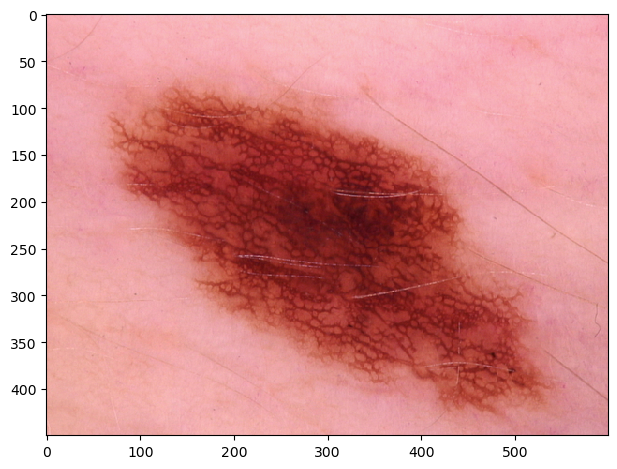

Image 2 shape is (450, 600, 3)
Image 2 size is 810000


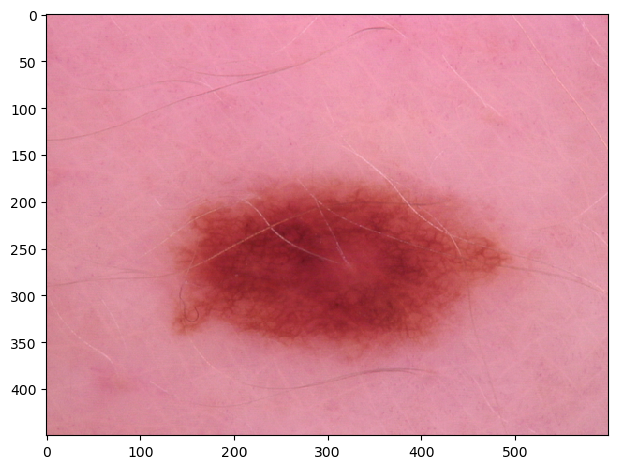

Image 3 shape is (450, 600, 3)
Image 3 size is 810000


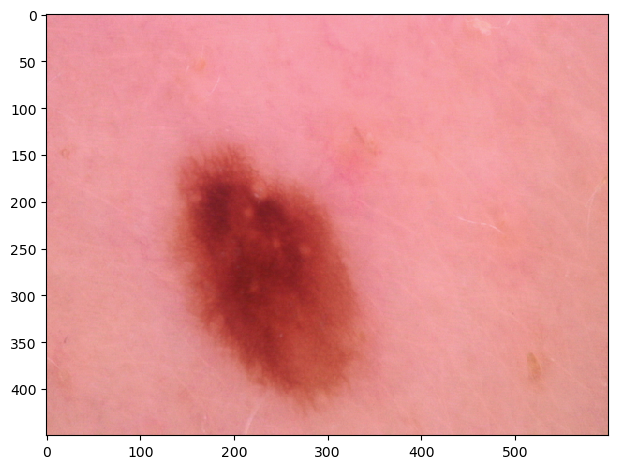

In [3]:
from PIL import Image
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

#image 1
img1  = Image.open("C:/Users/bo24669/OneDrive - University of Bristol/Documents/04. Research Advocate/Stretch/mole.jpg") #make sure to specify your own working directory
img1 = np.array(img1)
print('Image 1 shape is', img1.shape)
print("Image 1 size is", img1.size)

%matplotlib inline
io.imshow(img1)
plt.show()

#image 2
img2  = Image.open("C:/Users/bo24669/OneDrive - University of Bristol/Documents/04. Research Advocate/Stretch/mole2.jpg") #make sure to specify your own working directory
img2 = np.array(img2)
print('Image 2 shape is', img2.shape)
print("Image 2 size is", img2.size)

%matplotlib inline
io.imshow(img2)
plt.show()

#image 3
img3  = Image.open("C:/Users/bo24669/OneDrive - University of Bristol/Documents/04. Research Advocate/Stretch/mole3.jpg") #make sure to specify your own working directory
img3 = np.array(img3)
print('Image 3 shape is', img3.shape)
print("Image 3 size is", img3.size)

%matplotlib inline
io.imshow(img3)
plt.show()

We also need to flatten them and convert into a pandas data frames

In [5]:
from pandas import DataFrame
from matplotlib import colors

#image 1
img1 = np.array(img1, dtype=np.float64) / 255  # Scale values
w, h, d = original_shape = tuple(img1.shape)  # Get the current shape
img1_array = np.reshape(img1, (w * h, d))  # Reshape to to 2D

pixels1 = DataFrame(img1_array, columns=["Red", "Green", "Blue"]) #convert to pandas
pixels1["colour"] = [colors.to_hex(p) for p in img1_array] #add colours column 
print(pixels1)

#image 2
img2 = np.array(img2, dtype=np.float64) / 255  # Scale values
w, h, d = original_shape = tuple(img2.shape)  # Get the current shape
img2_array = np.reshape(img2, (w * h, d))  # Reshape to to 2D

pixels2 = DataFrame(img2_array, columns=["Red", "Green", "Blue"]) #convert to pandas
pixels2["colour"] = [colors.to_hex(p) for p in img2_array] #add colours column 
print(pixels2)

#image 3
img3 = np.array(img3, dtype=np.float64) / 255  # Scale values
w, h, d = original_shape = tuple(img3.shape)  # Get the current shape
img3_array = np.reshape(img3, (w * h, d))  # Reshape to to 2D

pixels3 = DataFrame(img3_array, columns=["Red", "Green", "Blue"]) #convert to pandas
pixels3["colour"] = [colors.to_hex(p) for p in img3_array] #add colours column 
print(pixels3)

             Red     Green      Blue   colour
0       0.949020  0.662745  0.698039  #f2a9b2
1       0.964706  0.678431  0.713725  #f6adb6
2       0.964706  0.678431  0.713725  #f6adb6
3       0.964706  0.686275  0.717647  #f6afb7
4       0.968627  0.690196  0.705882  #f7b0b4
...          ...       ...       ...      ...
269995  0.847059  0.572549  0.611765  #d8929c
269996  0.850980  0.576471  0.607843  #d9939b
269997  0.847059  0.572549  0.603922  #d8929a
269998  0.847059  0.564706  0.607843  #d8909b
269999  0.850980  0.568627  0.611765  #d9919c

[270000 rows x 4 columns]
             Red     Green      Blue   colour
0       0.890196  0.560784  0.650980  #e38fa6
1       0.894118  0.564706  0.654902  #e490a7
2       0.886275  0.556863  0.647059  #e28ea5
3       0.874510  0.564706  0.639216  #df90a3
4       0.878431  0.568627  0.654902  #e091a7
...          ...       ...       ...      ...
269995  0.843137  0.560784  0.647059  #d78fa5
269996  0.823529  0.556863  0.639216  #d28ea3
269997 

**Exercise**: At the moment we are loading and editing each image seperately - this can be time consuming with large data sets. How can we make this process faster? 

*Answer*: use a loop - incldue example of a for loop

To run the clustering on a set of images we need to stack the data frames into one. We will add a new column to indicate which image the data came from. 

In [9]:
#first we need to add a new column to our data sets to indicate which image they came from 
import pandas as pd

pixels1['image'] = '1'
pixels2['image'] = '2'
pixels3['image'] = '3'

pixels = pd.concat([pixels1, pixels2, pixels3], ignore_index = True, axis = 0) #axis 0 indicates stacking verticallu

print(pixels)


             Red     Green      Blue   colour image
0       0.949020  0.662745  0.698039  #f2a9b2     1
1       0.964706  0.678431  0.713725  #f6adb6     1
2       0.964706  0.678431  0.713725  #f6adb6     1
3       0.964706  0.686275  0.717647  #f6afb7     1
4       0.968627  0.690196  0.705882  #f7b0b4     1
...          ...       ...       ...      ...   ...
809995  0.827451  0.560784  0.525490  #d38f86     3
809996  0.831373  0.564706  0.521569  #d49085     3
809997  0.839216  0.580392  0.525490  #d69486     3
809998  0.839216  0.580392  0.525490  #d69486     3
809999  0.823529  0.576471  0.509804  #d29382     3

[810000 rows x 5 columns]


**Exercise** Explore the data in the same was as the previous exercise. Do you notice anything from the correlations?

We can now run K-means clustering in the same way as before. First by sampling a subset of pixels and assign our cluster centres. In order to compare the size of the dermatological features across the images, we want to measure the pixels that are and aren't dark space. We could try to use 2 clusters for this.

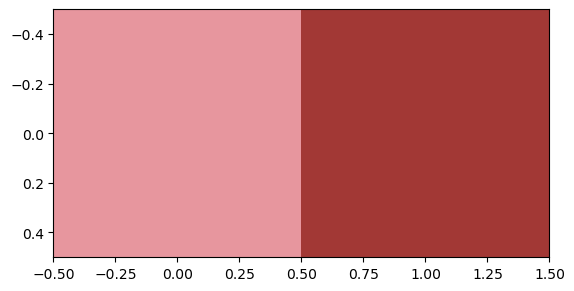

In [23]:
pixels_sample = pixels.sample(frac=0.05) #look at 5% of the data

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init="auto").fit(pixels_sample[["Red", "Green", "Blue"]])
plt.imshow([kmeans.cluster_centers_])
plt.show()


In the same way as before see how it looks compared to the original image. Does two clusters sufficiently define the dark areas. **NOTE** *Could make this an exercise?*

We can now run our clustering with our whole data set.

In [25]:
labels = kmeans.predict(pixels[["Red", "Green", "Blue"]])
labels

array([0, 0, 0, ..., 0, 0, 0])

Now we have used the clustering algorithm to cluster pixels into dark and light areas, we can manipulate our data frame to compare the size of the features in the images. 

First we want to add the clustering array to the pandas data frame 

In [27]:
#add the clustering array as a new column 

pixels['cluster'] = labels.tolist()
print(pixels)

             Red     Green      Blue   colour image  cluster
0       0.949020  0.662745  0.698039  #f2a9b2     1        0
1       0.964706  0.678431  0.713725  #f6adb6     1        0
2       0.964706  0.678431  0.713725  #f6adb6     1        0
3       0.964706  0.686275  0.717647  #f6afb7     1        0
4       0.968627  0.690196  0.705882  #f7b0b4     1        0
...          ...       ...       ...      ...   ...      ...
809995  0.827451  0.560784  0.525490  #d38f86     3        0
809996  0.831373  0.564706  0.521569  #d49085     3        0
809997  0.839216  0.580392  0.525490  #d69486     3        0
809998  0.839216  0.580392  0.525490  #d69486     3        0
809999  0.823529  0.576471  0.509804  #d29382     3        0

[810000 rows x 6 columns]


We can then plot the amount of dark space for each image  

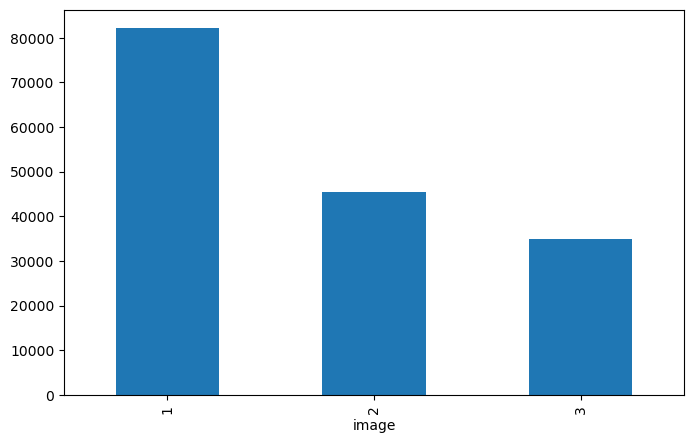

In [33]:
# Filter only rows where cluster == 0
pixels_fil = pixels[pixels["cluster"] == 1]

# Count occurrences of cluster 0 per image
dark_counts= pixels_fil["image"].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
dark_counts.plot(kind="bar")
plt.show()

In a real data set we would have lots of different images. Using clustering this way would save time in measuring images. 

Can you think of other applications? Cell types on slides - how many clusters would you want then? 